In [2]:
import os
import pandas as pd
import re

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
###loading data 

trainds=pd.read_csv('./data/Train.csv')
print(len(trainds))

40000


In [6]:
trainds.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [24]:
trainds.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Mean is approximately 0.5 suggesting that there are equal number of negative and positive reviews. 

## preprocessing 

In [4]:

## remove emojis
## remove any special character

def preprocess(text):
    emoji = re.compile('[\U00010000-\U0010ffff]')
    spe=re.compile("[^a-zA-Z]")
    text= emoji.sub(r'', text)
    text= spe.sub(r' ',text)
    return text



In [5]:
token=ToktokTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english') 

## adding extra words to account for \n and \br
extra=['n','br']
[stop_words.append(w) for w in extra];


In [6]:
X=trainds.iloc[:,0].values

In [7]:
words=[]
for review in X:
    review=preprocess(review)

    review= token.tokenize(review)

    review = [lemmatizer.lemmatize(word) for word in review]
    review= [review for review in review if review.lower() not in set(stop_words)]
    review=' '.join(review)
    
    words.append(review)
    #print(review)
    
print(words)    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
vectorizer = TfidfVectorizer(max_features=100)
fitmodel = vectorizer.fit_transform(words)

In [10]:
print(fitmodel.shape)

(40000, 100)


In [11]:
y=list(trainds.label)


In [12]:

X_train, X_test, y_train, y_test = train_test_split(fitmodel, y, test_size = 0.20, random_state = 0)

In [13]:
review=MultinomialNB().fit(X_train, y_train)

In [14]:
y_pred=review.predict(X_test)

In [19]:
cf_matrix=confusion_matrix(y_test,y_pred)

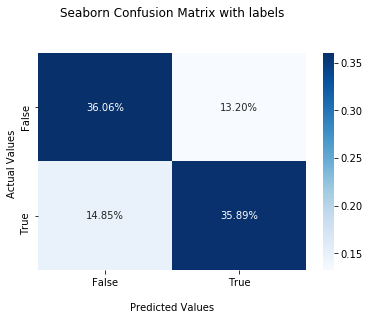

In [25]:
labels = ['True Neg','False Pos','False Neg','True Pos']

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()